# Network Graphs 
- Network graphs are used to visualize the connections between items in our dataset

### Installation
- **networkx**
    - pip install `networkx`
    - conda install -c conda-forge `networkx`
- **nxviz**
    - pip install `nxviz`
    - conda install -c conda-forge `nxviz` 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Undirected Graphs 

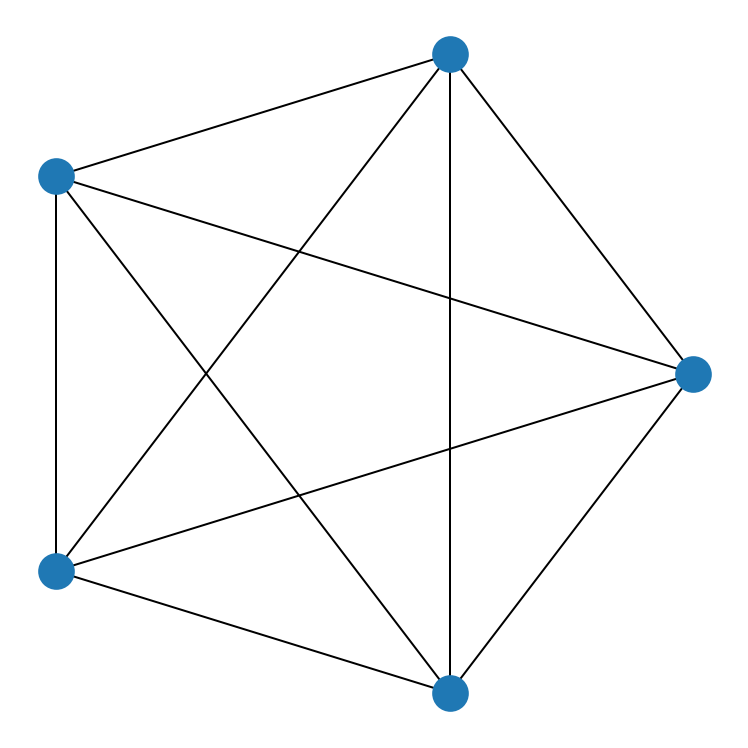

In [2]:
G = nx.complete_graph(5)
plt.figure(figsize=(5,5))
nx.draw_circular(G)

Edges are the connection between two points

In [3]:
# we can see all the edges in G
list(G.edges())

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

### Adjacency matrix

In [4]:
G.nodes()

NodeView((0, 1, 2, 3, 4))

In [5]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1],
        [1, 1, 1, 1, 0]], dtype=int64)

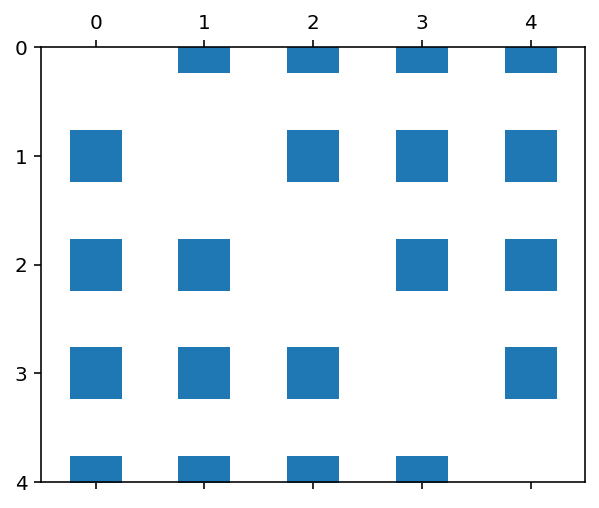

In [6]:
# Graphical view of connections
plt.spy(nx.adjacency_matrix(G).todense(), markersize=25)
plt.xticks(ticks=range(len(G.nodes())), labels=[str(x) for x in G.nodes()])
plt.yticks(ticks=range(len(G.nodes())), labels=[str(x) for x in G.nodes()])

plt.show();

### Types of graphs 
- Non-directed graphs
- Directed Graphs
- Bipartite Graphs
    - Graphs consiting of two groups of nodes. There are link between these two groups . But no link among the same groups.

https://www.geeksforgeeks.org/directed-graphs-multigraphs-and-visualization-in-networkx/

https://plotly.com/python/network-graphs/

Reference to use in this class: 
https://www.datacamp.com/community/tutorials/social-network-analysis-python 


In [7]:
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

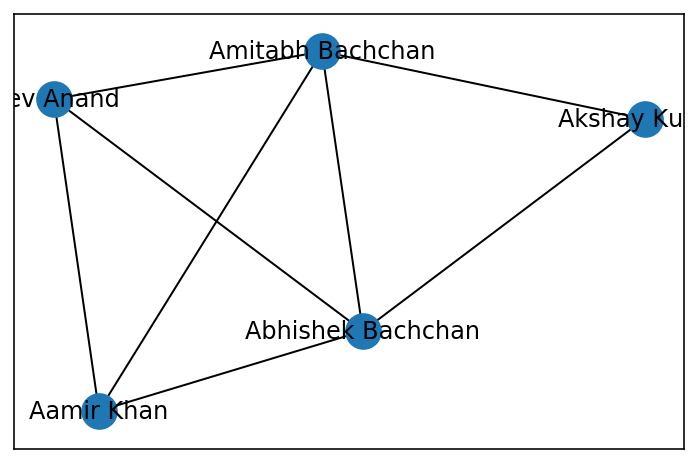

In [9]:
nx.draw_networkx(G_symmetric)

In [8]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

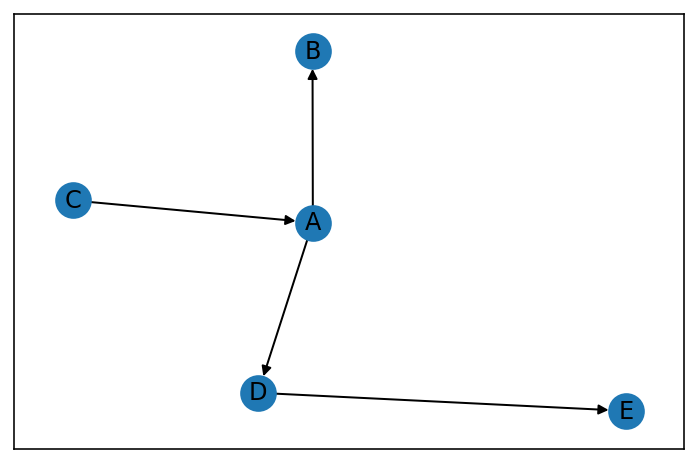

In [10]:
nx.draw_networkx(G_asymmetric)

In [13]:
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=1000)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)

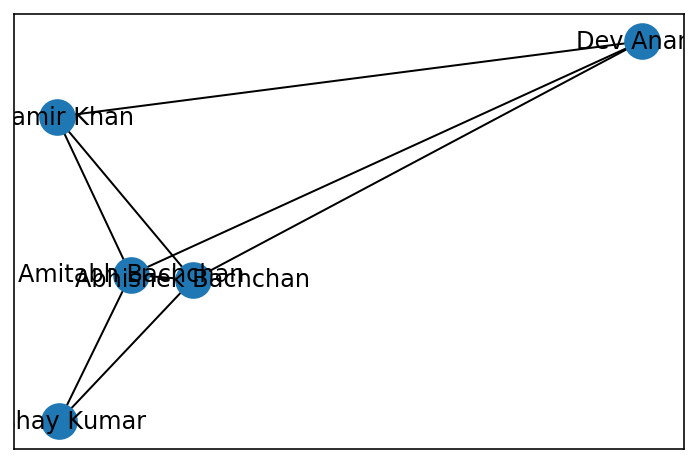

In [14]:
nx.draw_networkx(G_weighted)

In [15]:
G = nx.MultiGraph()
G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C',relation='friend')

0

In [22]:
G.edges(data=True)

MultiEdgeDataView([('A', 'B', {'relation': 'neighbor'}), ('A', 'B', {'relation': 'friend'}), ('B', 'C', {'relation': 'neighbor'}), ('C', 'D', {'relation': 'friend'})])

In [23]:
nx.average_clustering(G_symmetric)


0.8666666666666666

In [24]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)


In [25]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


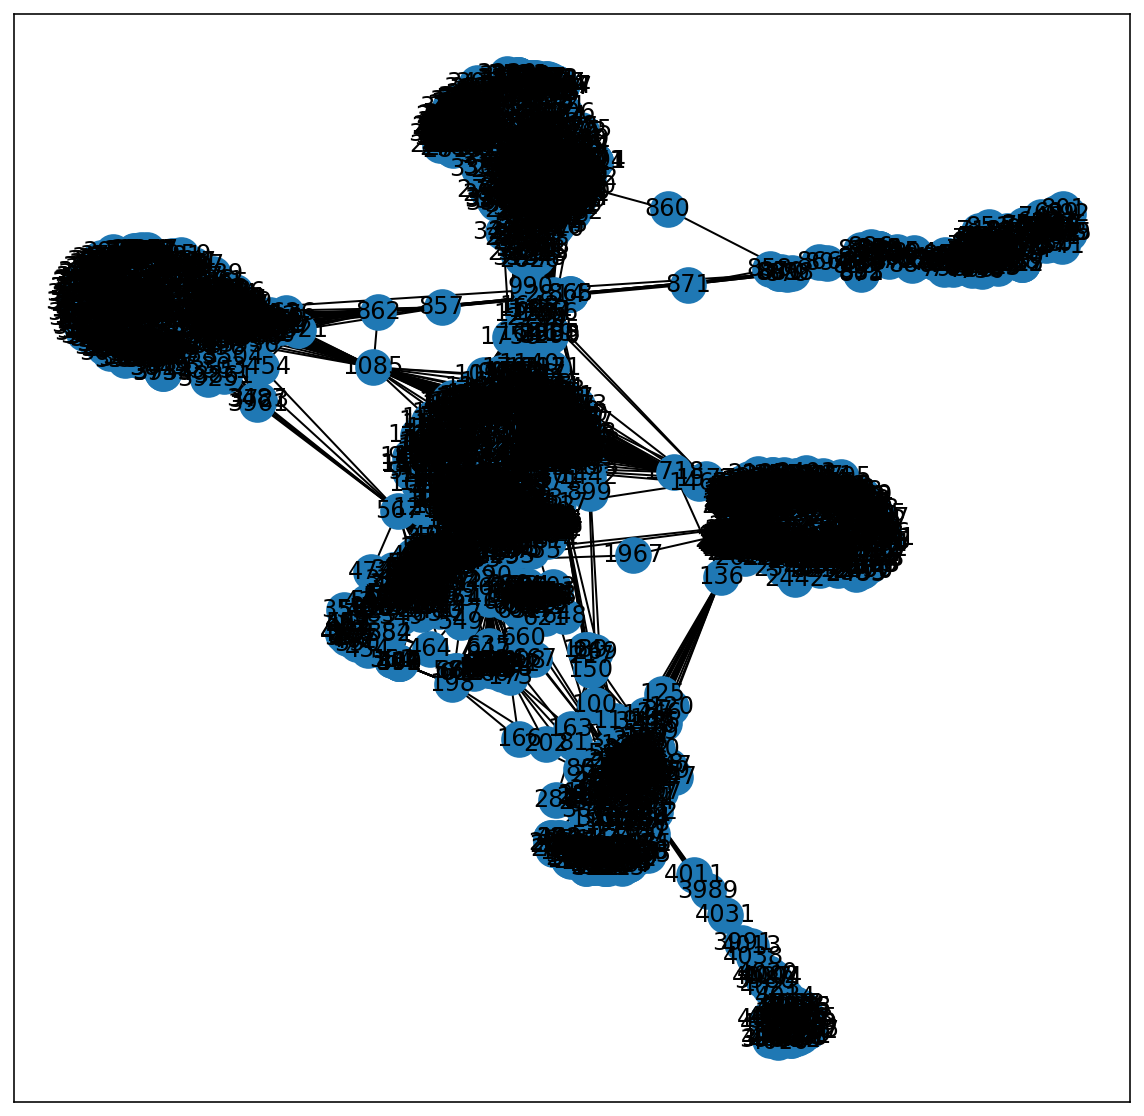

In [26]:
plt.figure(figsize = (10,10))
nx.spring_layout(G_fb)
nx.draw_networkx(G_fb)

In [27]:
G_fb_1 = nx.read_edgelist("facebook_combined_edit.txt", create_using = nx.Graph(), nodetype=int)


In [29]:
print(nx.info(G_fb_1))

Name: 
Type: Graph
Number of nodes: 359
Number of edges: 1577
Average degree:   8.7855


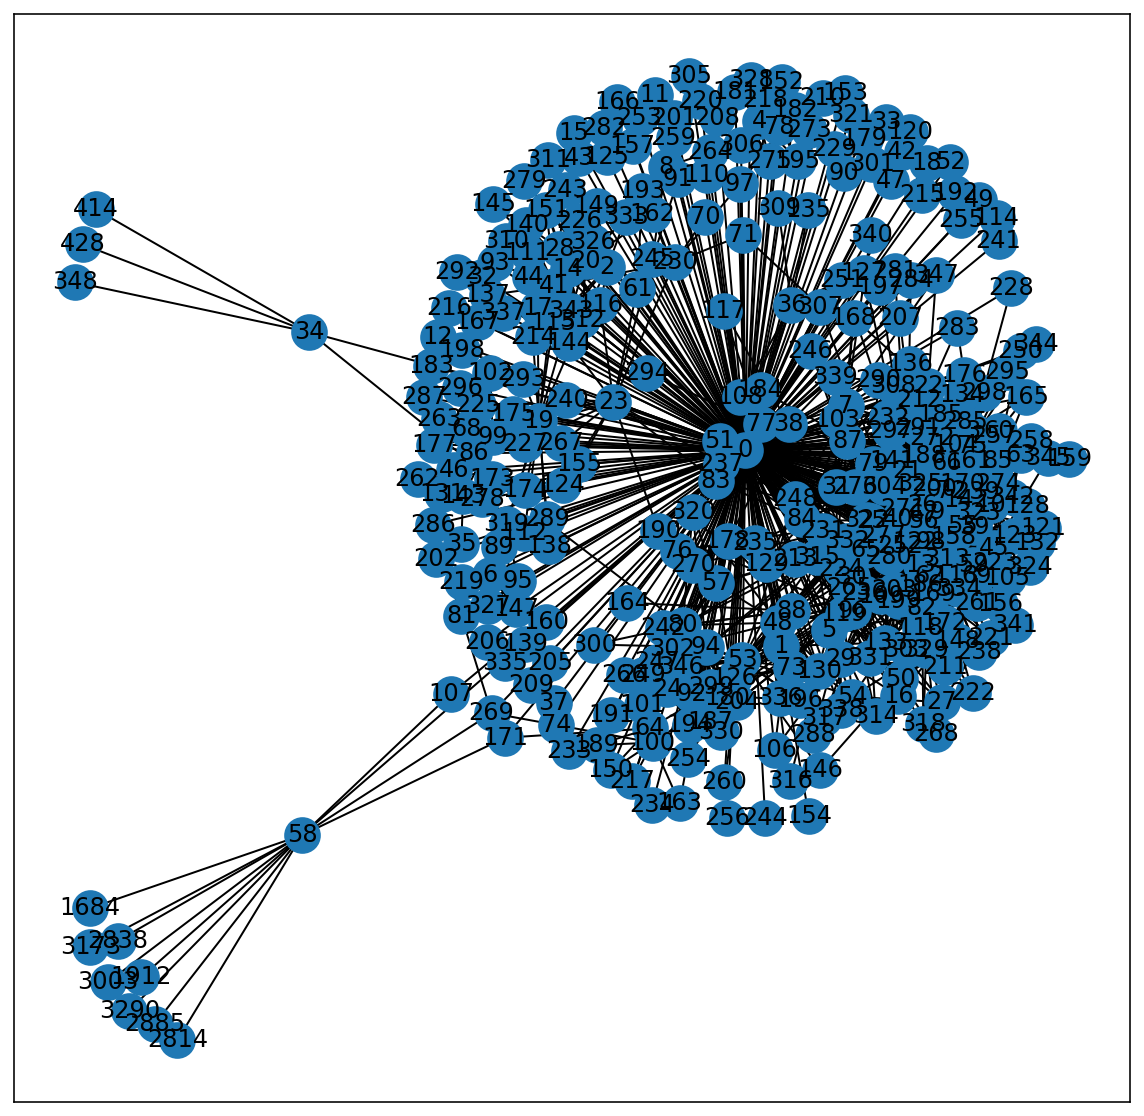

In [30]:
plt.figure(figsize = (10,10))
nx.spring_layout(G_fb_1)
nx.draw_networkx(G_fb_1)

## Exercise 1
- Pick **3** companies and create a network graph of the major investors and the comapnies 

In [7]:
# company Tenaga , IHH, Simeplt
import pandas as pd

df = pd.read_csv ("network_company.csv")

df_new = df.dropna()

df_new


Shareholder  Company
0                            Khazanah Nasional Berhad   Tenaga
1                      Employees Provident Fund Board   Tenaga
2                             Amanah Saham Bumiputera   Tenaga
3             Kumpulan Wang Persaraan (Diperbadankan)   Tenaga
4                          Permodalan Nasional Berhad   Tenaga
..                                                ...      ...
79                         Public Ittikal Sequel Fund  SIMEPLT
80             Public Islamic Select Enterprises Fund  SIMEPLT
81  Flexshares Morningstar Global Upstream Natural...  SIMEPLT
82                      Pertubuhan Keselamatan Sosial  SIMEPLT
83                               UOB Kay Hian Pte Ltd  SIMEPLT

[83 rows x 2 columns]

In [8]:
#G_company = nx.read_edgelist("network_company.csv", delimiter = ',', create_using = nx.Graph(), nodetype=int, encoding ='utf-8', edgetype =int)

#G = nx.read_edgelist('nodes', delimiter=',', nodetype=int, encoding="utf-8")

G_company = nx.from_pandas_edgelist(df_new, source='Shareholder', target='Company')

G_company

#nx.from_pandas_edgelist()



In [9]:
print(nx.info(G_company))

Name: 
Type: Graph
Number of nodes: 46
Number of edges: 83
Average degree:   3.6087


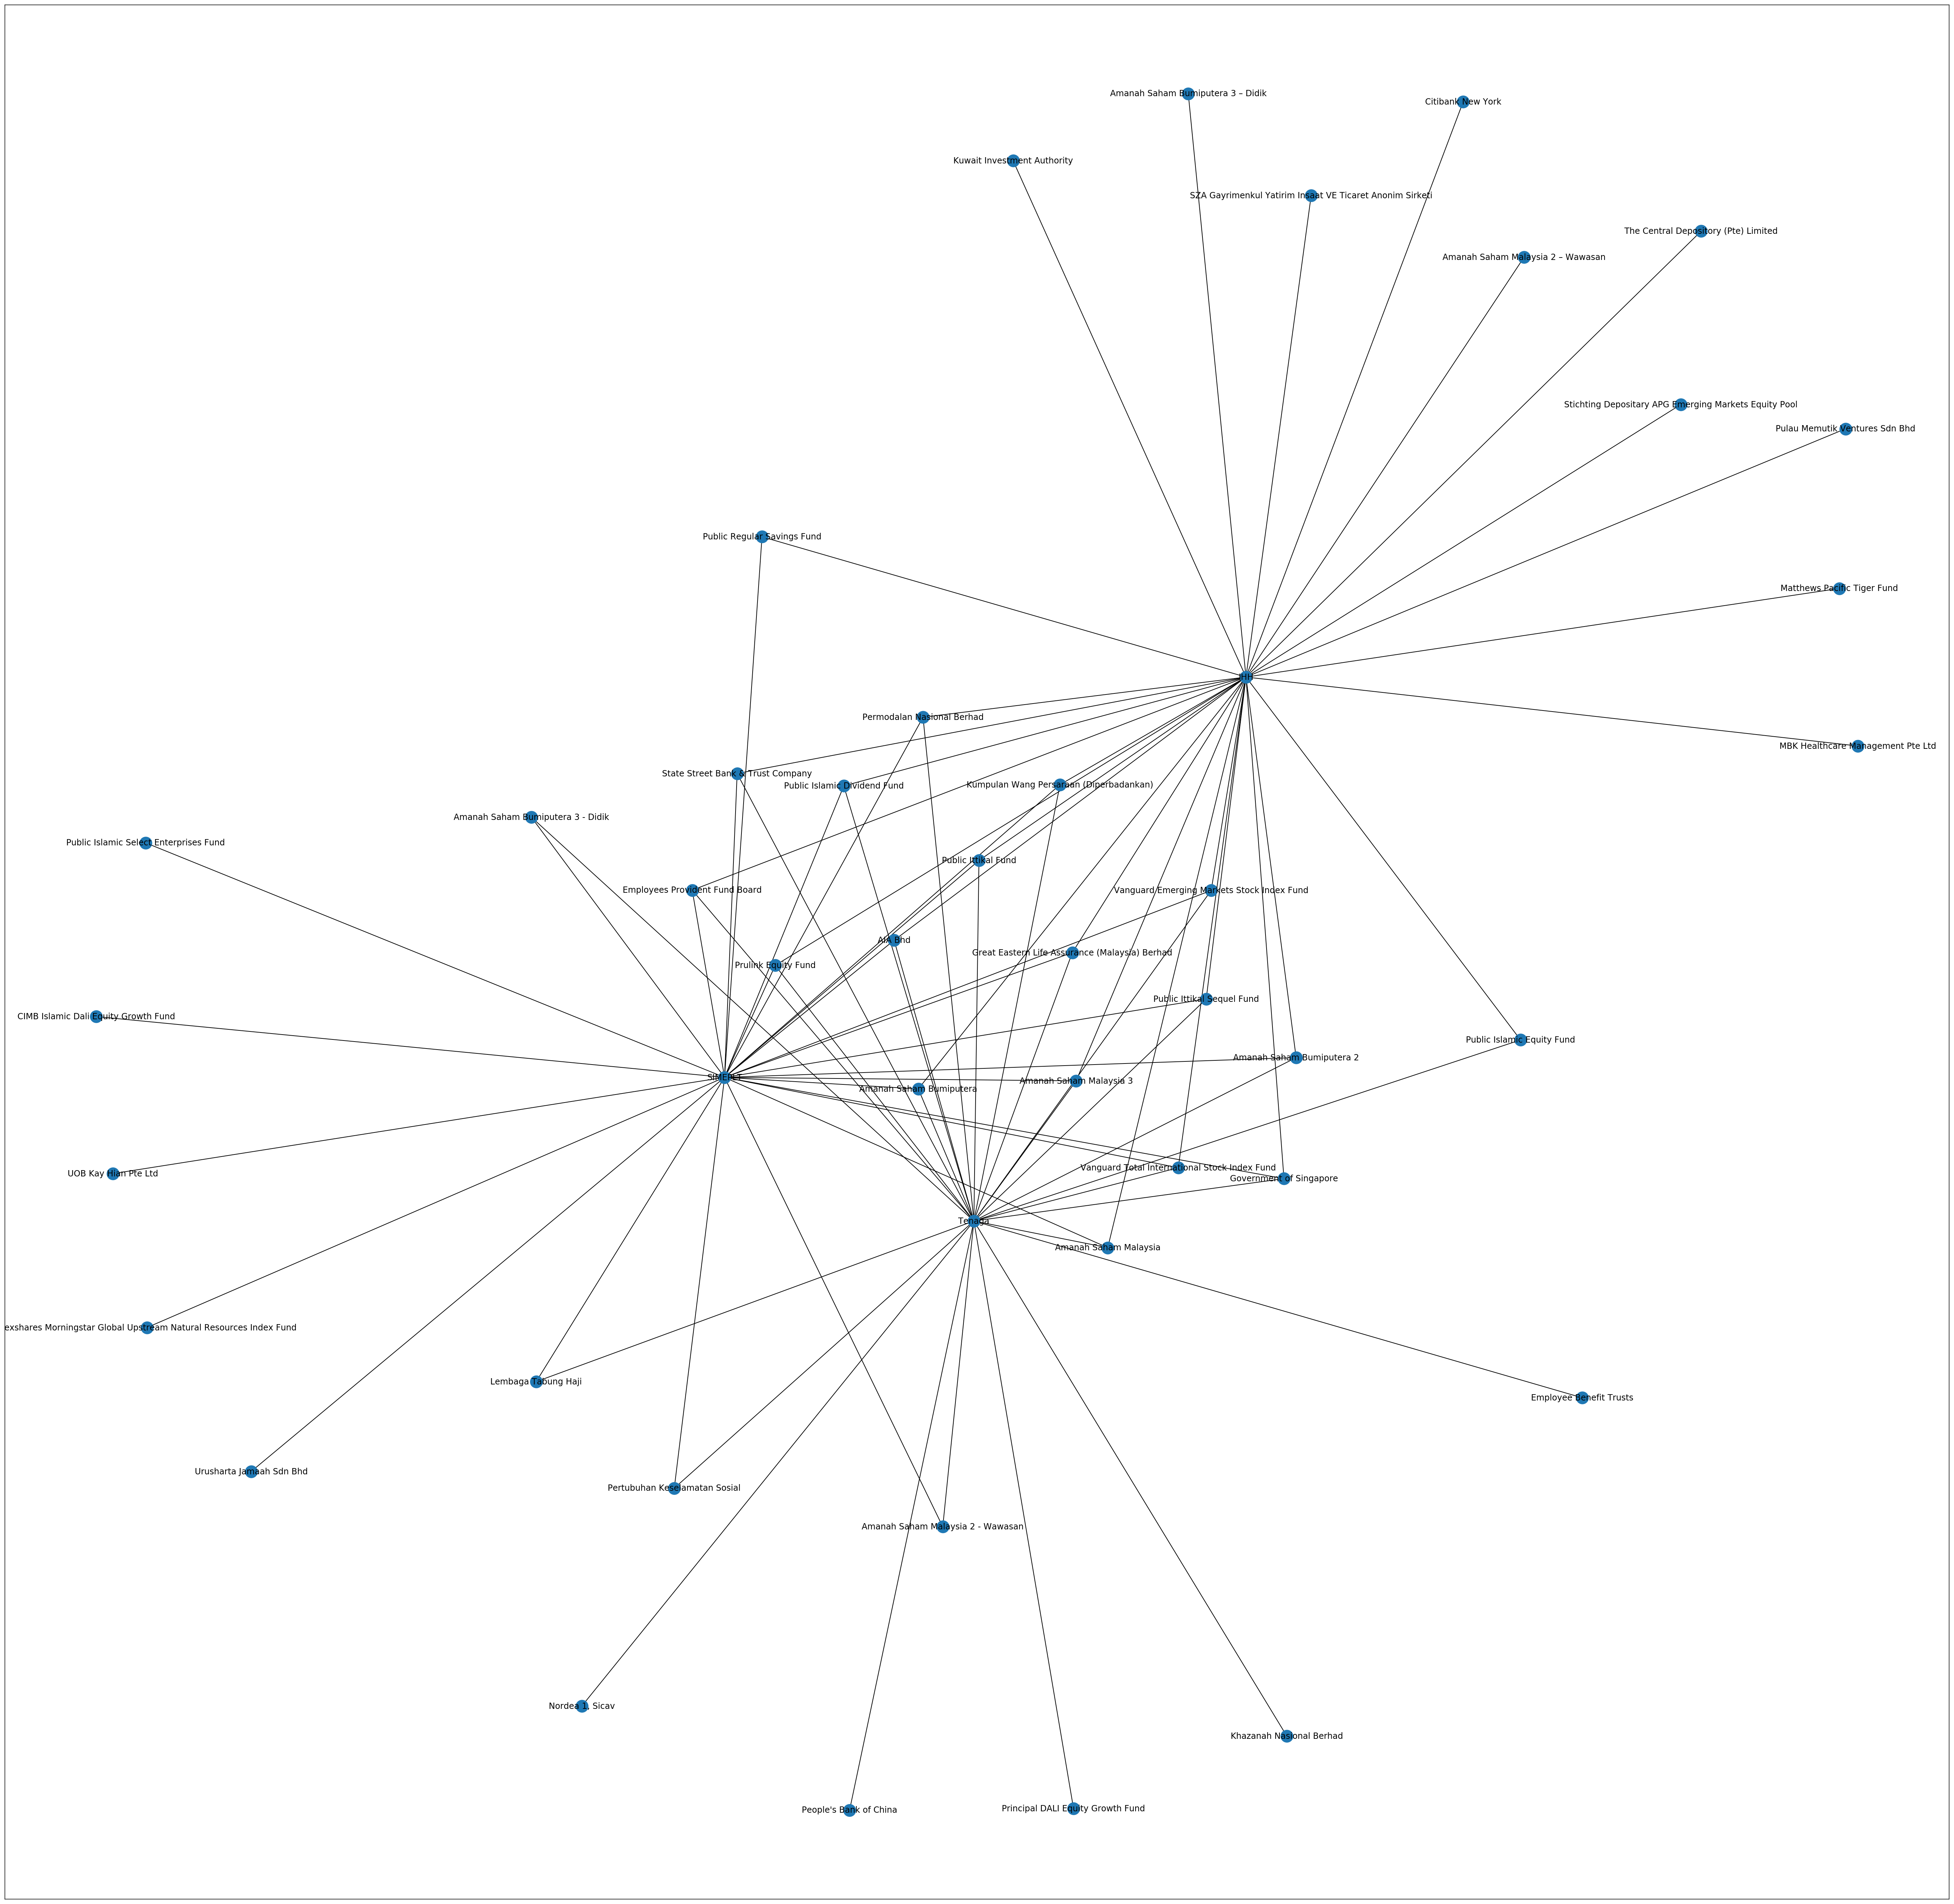

In [10]:
plt.figure(figsize = (50,50))
nx.spring_layout(G_company)
nx.draw_networkx(G_company)

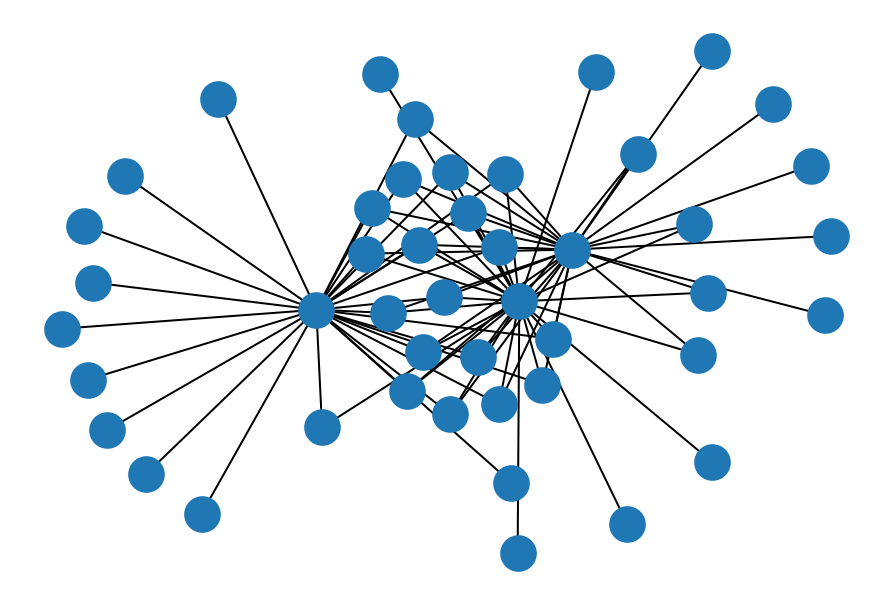

In [11]:
nx.draw(G_company)

In [12]:
# Make a list of the clubs, we'll use it later
companys = list(df.Company.unique())
companys

['Tenaga', nan, 'IHH', 'SIMEPLT']

In [13]:
df['Company'].isnull().values.any()

True

In [14]:
df_new

Shareholder  Company
0                            Khazanah Nasional Berhad   Tenaga
1                      Employees Provident Fund Board   Tenaga
2                             Amanah Saham Bumiputera   Tenaga
3             Kumpulan Wang Persaraan (Diperbadankan)   Tenaga
4                          Permodalan Nasional Berhad   Tenaga
..                                                ...      ...
79                         Public Ittikal Sequel Fund  SIMEPLT
80             Public Islamic Select Enterprises Fund  SIMEPLT
81  Flexshares Morningstar Global Upstream Natural...  SIMEPLT
82                      Pertubuhan Keselamatan Sosial  SIMEPLT
83                               UOB Kay Hian Pte Ltd  SIMEPLT

[83 rows x 2 columns]

In [15]:
df_new['Company'].isnull().values.any()

False

Create list from companies , shareholders

In [17]:
companies = list(df_new.Company.unique())
companies

['Tenaga', 'IHH', 'SIMEPLT']

In [18]:
# Make a list of the clubs, we'll use it later
shareholders = list(df_new.Shareholder.unique())
shareholders

['Khazanah Nasional Berhad',
 'Employees Provident Fund Board',
 'Amanah Saham Bumiputera',
 'Kumpulan Wang Persaraan (Diperbadankan)',
 'Permodalan Nasional Berhad',
 'Amanah Saham Malaysia 2 - Wawasan',
 'Great Eastern Life Assurance (Malaysia) Berhad',
 'Amanah Saham Malaysia',
 'State Street Bank & Trust Company',
 'Vanguard Total International Stock Index Fund',
 'Prulink Equity Fund',
 'Vanguard Emerging Markets Stock Index Fund',
 'AIA Bhd',
 'Public Ittikal Fund',
 'Amanah Saham Bumiputera 2',
 'Lembaga Tabung Haji',
 'Amanah Saham Malaysia 3',
 'Amanah Saham Bumiputera 3 - Didik',
 'Public Islamic Dividend Fund',
 'Government of Singapore',
 'Public Ittikal Sequel Fund',
 "People's Bank of China",
 'Nordea 1, Sicav',
 'Principal DALI Equity Growth Fund',
 'Public Islamic Equity Fund',
 'Pertubuhan Keselamatan Sosial',
 'Employee Benefit Trusts',
 'MBK Healthcare Management Pte Ltd',
 'Pulau Memutik Ventures Sdn Bhd',
 'The Central Depository (Pte) Limited',
 'Kuwait Investment

In [19]:
dict(zip(companies, companies))

{'Tenaga': 'Tenaga', 'IHH': 'IHH', 'SIMEPLT': 'SIMEPLT'}

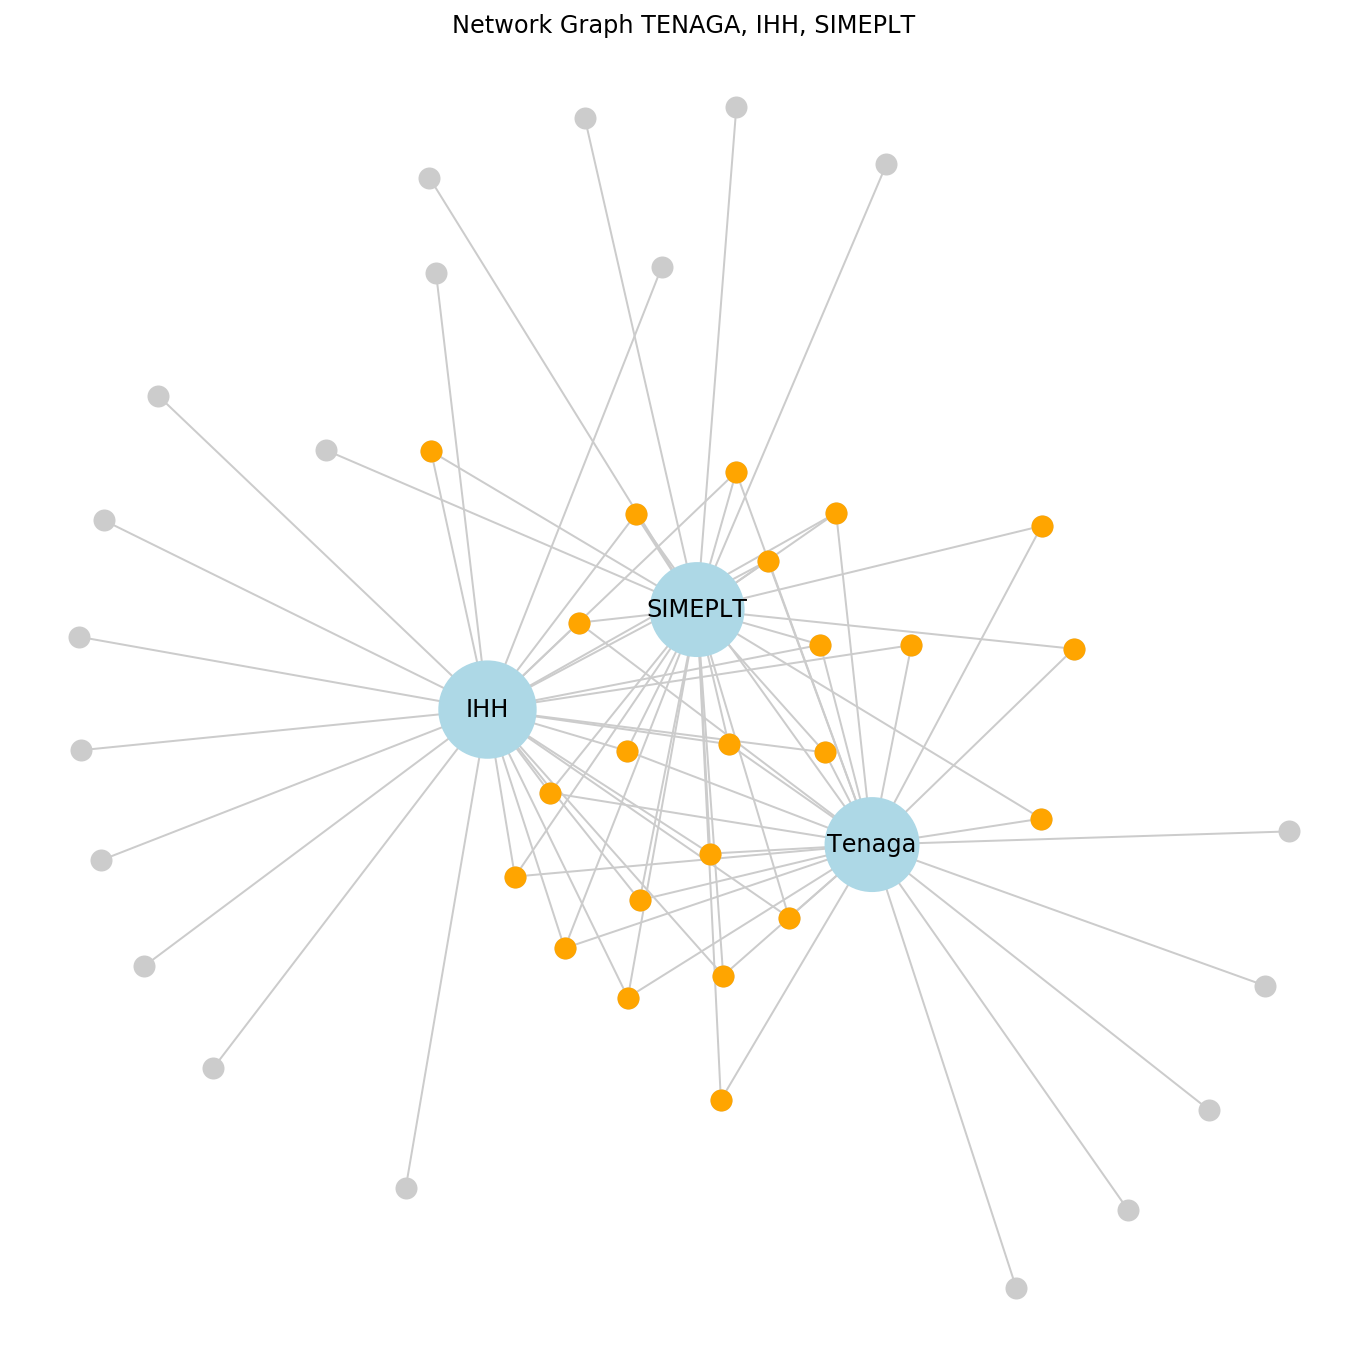

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph

#G_company = nx.from_pandas_edgelist(df_new, source='Shareholder', target='Company')

g = nx.from_pandas_edgelist(df_new, source='Shareholder', target='Company') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size

companies_size = [g.degree(company) * 80 for company in companies]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=companies, 
                       node_size=companies_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw EVERYONE
nx.draw_networkx_nodes(g, layout, nodelist=shareholders, node_color='#cccccc', node_size=100)

# Draw POPULAR PEOPLE
# i = shareholder
popular_shareholders = [i for i in shareholders if g.degree(i) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_shareholders, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(companies, companies))
nx.draw_networkx_labels(g, layout, labels=node_labels)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Network Graph TENAGA, IHH, SIMEPLT")

# 5. Tell matplotlib to show it
plt.show()

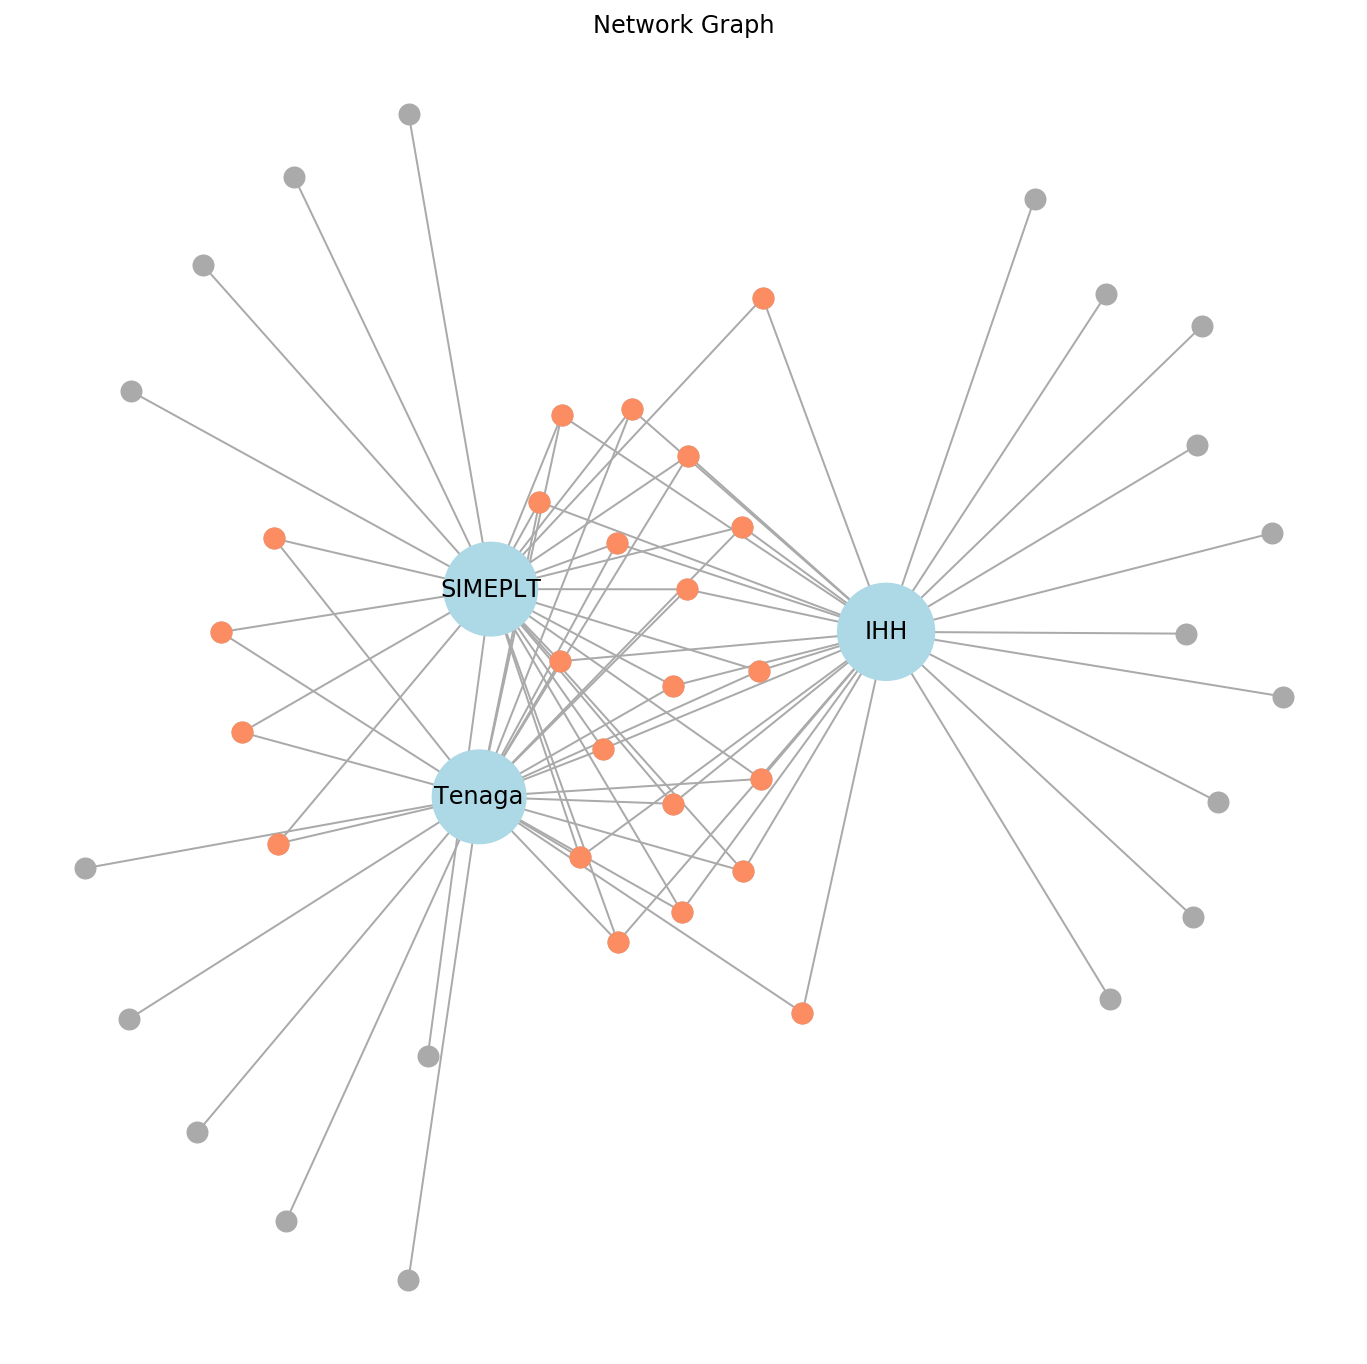

In [23]:
# other version


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph

g = nx.from_pandas_edgelist(df_new, source='Shareholder', target='Company') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

companies = [node for node in g.nodes() if node in df_new.Company.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df_new.Company.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=companies, node_size=size, node_color='lightblue')


shareholders = [node for node in g.nodes() if node in df_new.Shareholder.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=shareholders, node_size=100, node_color='#AAAAAA')


high_degree_shareholders = [node for node in g.nodes() if node in df_new.Shareholder.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_shareholders, node_size=100, node_color='#fc8d62')


companies_dict = dict(zip(companies, companies))
nx.draw_networkx_labels(g, layout, labels=companies_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Network Graph")

# 5. Tell matplotlib to show it
plt.show()